# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [3]:
T = np.array([[0.5, 0.5],
              [1.0, -1.0]])

original = df[['p1', 'p2']].to_numpy().T 
transformed = T @ original  

df['media'] = transformed[0]
df['diferenca'] = transformed[1]

cor_p1_p2 = df['p1'].corr(df['p2'])
print("Correlação entre p1 e p2:", cor_p1_p2)

Correlação entre p1 e p2: 0.8957365818728046


In [4]:
cor_media_dif = df['media'].corr(df['diferenca'])
print("Correlação entre média e diferença:", cor_media_dif)

Correlação entre média e diferença: -0.13347385411788837


A correlação entre p1 e p2 deve ser positiva e alta, pois p2 foi gerada como p1 + ruído normal (com pequena variância).

A transformação linear (média e diferença) foi projetada para reduzir a correlação — ou seja, média e diferença devem ser quase não correlacionadas, possivelmente próximas de zero.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

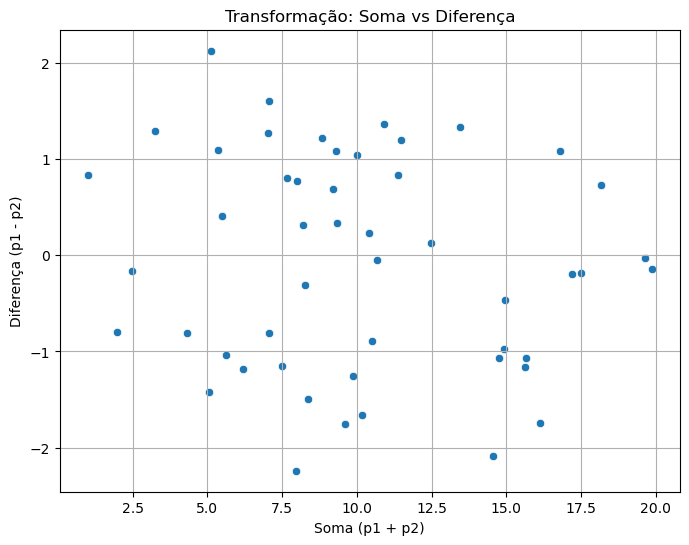

In [5]:
np.random.seed(123)

p1 = np.random.random(50) * 10
p2 = p1 + np.random.normal(0, 1, 50)
p1 = np.clip(p1, 0, 10)
p2 = np.clip(p2, 0, 10)

df = pd.DataFrame({'p1': p1, 'p2': p2})

T_soma_dif = np.array([[1, 1],
                       [1, -1]])

original = df[['p1', 'p2']].to_numpy().T  
transformed_soma_dif = T_soma_dif @ original

df['soma'] = transformed_soma_dif[0]
df['diferenca'] = transformed_soma_dif[1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='soma', y='diferenca', data=df)
plt.title('Transformação: Soma vs Diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.grid(True)
plt.show()

A transformação para soma e diferença reorganiza os dados num novo plano.
Visualmente, agora é mais fácil ver quem teve desempenho total semelhante (mesma soma) e quem teve desequilíbrio entre as notas (valores extremos de diferença).